# 911 Calls Project

For this capstone project we will be analyzing some 911 call data. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

**Import numpy and pandas**

In [52]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

**Read in the csv file as a dataframe called df**

In [54]:
df = pd.read_csv('/content/drive/MyDrive/911.csv')
print(df)

             lat        lng  ...                            addr  e
0      40.297876 -75.581294  ...          REINDEER CT & DEAD END  1
1      40.258061 -75.264680  ...      BRIAR PATH & WHITEMARSH LN  1
2      40.121182 -75.351975  ...                        HAWS AVE  1
3      40.116153 -75.343513  ...              AIRY ST & SWEDE ST  1
4      40.251492 -75.603350  ...        CHERRYWOOD CT & DEAD END  1
...          ...        ...  ...                             ... ..
99487  40.132869 -75.333515  ...         MARKLEY ST & W LOGAN ST  1
99488  40.006974 -75.289080  ...  LANCASTER AVE & RITTENHOUSE PL  1
99489  40.115429 -75.334679  ...         CHESTNUT ST & WALNUT ST  1
99490  40.186431 -75.192555  ...           WELSH RD & WEBSTER LN  1
99491  40.207055 -75.317952  ...          MORRIS RD & S BROAD ST  1

[99492 rows x 9 columns]


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Check the info() of the df**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df (first 3 rows)**

In [57]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

**Show the top 5 zipcodes for 911 calls**

In [58]:
# top 5 zipcodes for 911 calls
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Show the top 5 townships (twp) for 911 calls**

In [59]:
# he top 5 townships (twp) for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [60]:
# number of unique title code in the data set
df['title'].nunique()

110

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.*

In [61]:
df['Reason'] = df['title'].apply(lambda title: title.split(":")[0]) #creating a new column 'reason'

**Count 911 calls based off of this new column by Reason**

In [62]:
df['Reason'].value_counts()  #getting the most common reason for calling 911

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Use seaborn to create a countplot of 911 calls by Reason.**

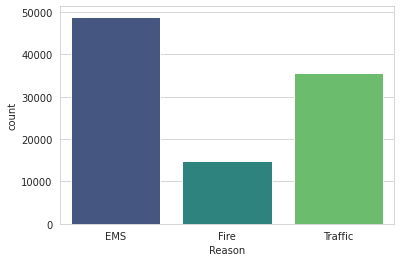

In [63]:
# use seaborn to create a countplot of 911 calls by Reason.

sns.countplot(x='Reason',data=df,palette='viridis')

**Show the data type of the objects in the timeStamp column?**

In [64]:
#converting the data type of timeStamp into pd.to_datetime format

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**These timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [65]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [66]:
time = df['timeStamp'].iloc[0]
time.hour

17

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.**

In [67]:
# creating 3 new columns called Hour, Month, and Day of Week.

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

**The Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [68]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [69]:
df['Day of Week'] = df['Day of Week'].map(dmap)

**Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

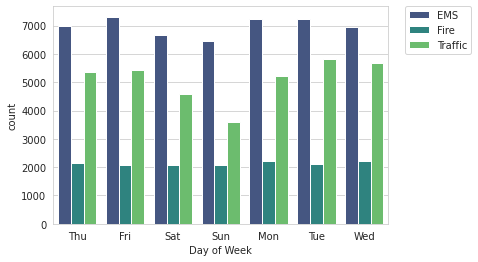

In [70]:
#creating a countplot of the Day of Week column with the hue based off of the Reason column
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # To relocate the legend

**Now do the same for Month:**

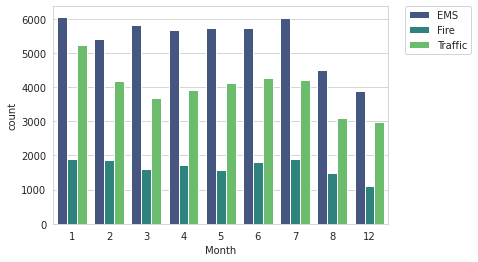

In [71]:
#creating a countplot of the Month with the hue based off of the Reason column

sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # To relocate the legend

**You should have noticed it was missing some Months, we fill in this information by plotting the information with a simple line plot that fills in the missing months**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method to show the head of this returned DataFrame.**

In [72]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Now create a simple plot off of the dataframe with .plot() indicating the count of calls per month.**

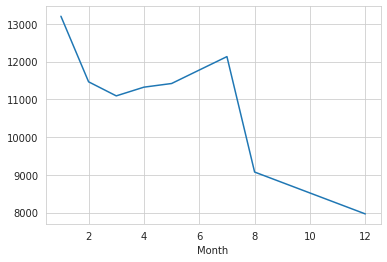

In [73]:
# create a simple plot off of the dataframe indicating the count of calls per month.
byMonth['twp'].plot()

**Use seaborn's lmplot() to create a linear fit on the number of calls per month. You may need to reset the index to a column.**

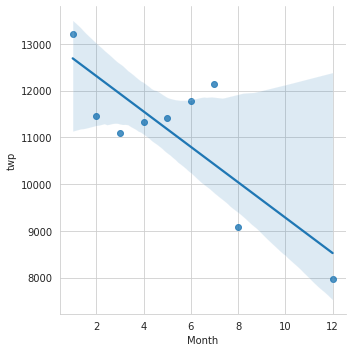

In [74]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [75]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

**Groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

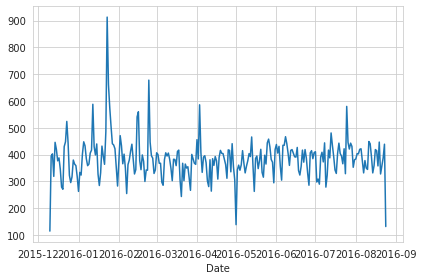

In [76]:
# roupby this Date column with the count() aggregate and create a plot of counts of 911 calls.
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

**Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call. Title the plot. Use plt.tight_layout() to adjust the axis**

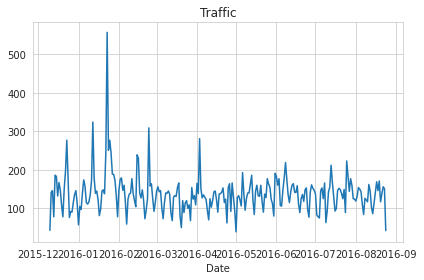

In [77]:
# 3 separate plots with each plot representing a Reason for the 911 call

df[df['Reason'] == "Traffic"].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

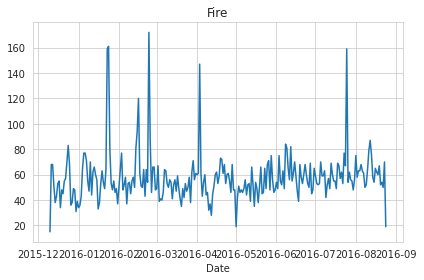

In [78]:
df[df['Reason'] == "Fire"].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()


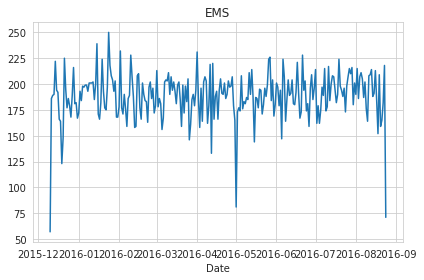

In [79]:
df[df['Reason'] == "EMS"].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()